In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
# Reading Dataset

data = pd.read_csv(r'C:\Users\Saloni\Downloads\Diwali Sales Data (1).csv', encoding = 'unicode_escape')

# to avoid encoding error, use 'unicode_escape'

In [7]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [8]:
data.shape

(11251, 15)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [10]:
# Droping 'Status' and 'unnamed' columns because there is no data

data.drop(['Status','unnamed1'], axis = 1, inplace = True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [12]:
# Checking for null values
data.isna().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [13]:
data.shape

(11251, 13)

In [14]:
# Droping null values
data.dropna(inplace = True)

In [15]:
data.shape

(11239, 13)

In [16]:
data.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [17]:
# Change data type of 'Amount' because i want whole numeric number

data['Amount'] = data['Amount'].astype('int')

In [18]:
data['Amount'].dtypes

dtype('int32')

In [19]:
# For checking columns name
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [20]:
# Rename column
data.rename(columns = {'Cust_name':'Customer_name'}) 
# this is only for showing that how to rename the column name. it is not save because er are not using 'inplace = True'

,User_ID,Customer_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [21]:
# Describe method returns description of the data in the dataframe. (i.e count, mean, std, iqr)
data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [22]:
# using describe() for specific columns

data[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis (EDA).

## Gender

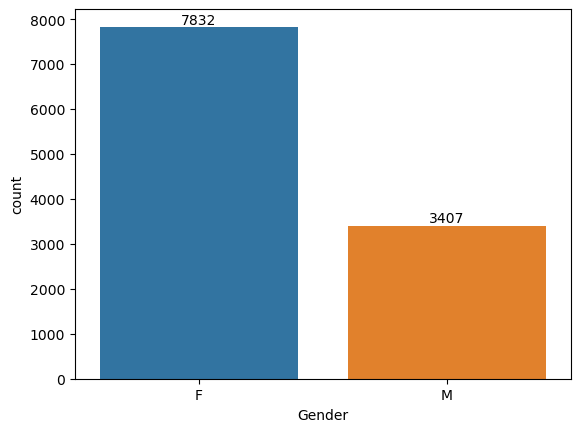

In [23]:
ax = sns.countplot(x = 'Gender', data = data)

for bars in ax.containers:
    ax.bar_label(bars)

In [24]:
data.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

,Gender,Amount
0,F,74335853
1,M,31913276


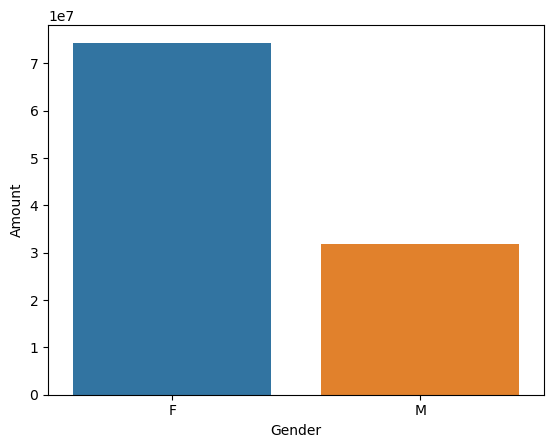

In [25]:
sales_gen = data.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
ax = sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)
plt.show()

from the above graph we can see that of the most bayer are female even the power of purchasing power of females are greater than man.

## Age

In [26]:
data.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934


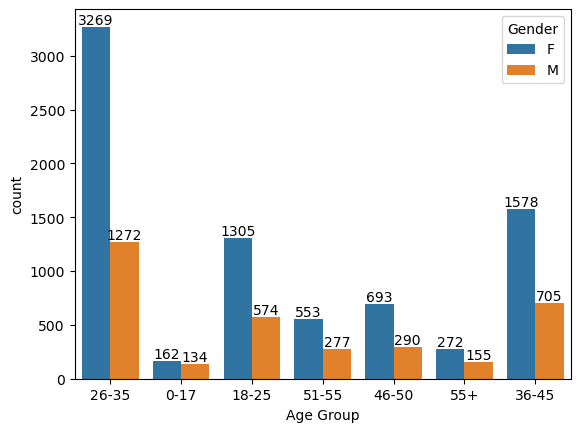

In [27]:
ax = sns.countplot(x = 'Age Group', data = data, hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

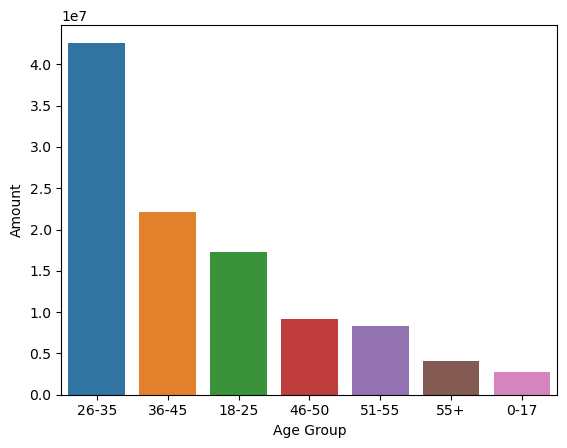

In [28]:
# Total Amount vs Age group

sales_age = data.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)
plt.show()

From the above graph we can see most of the bayers are of age group between 26-35 yrs female.

## State

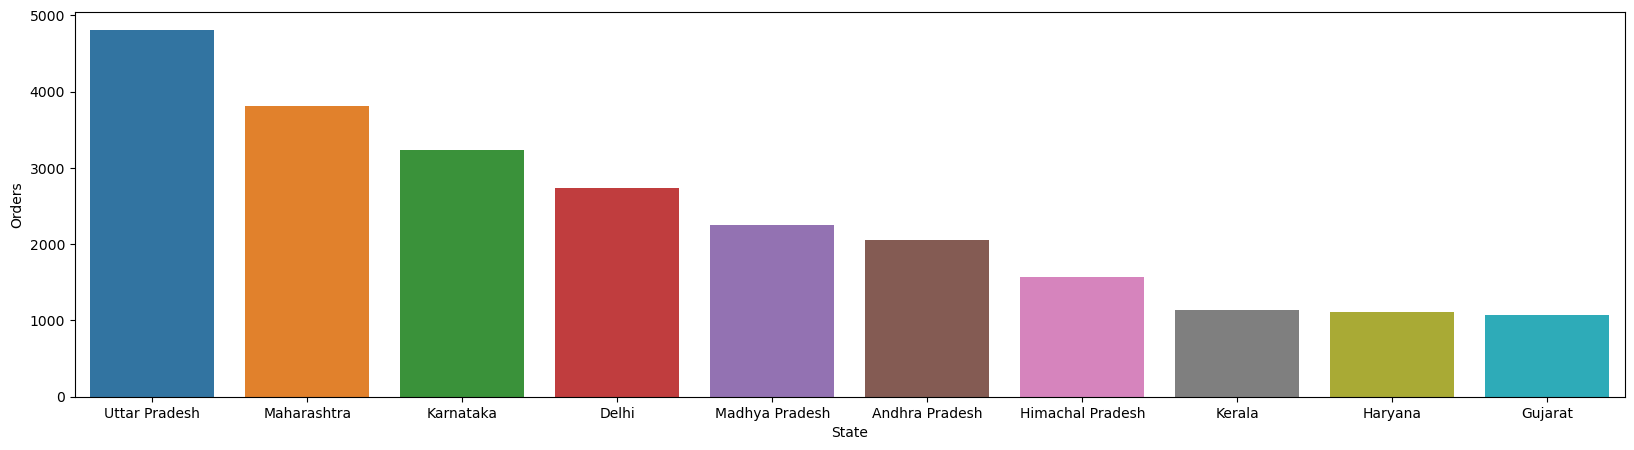

In [29]:
# Total number of orders from the top 10 states
sales_state = data.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by='Orders',ascending = False).head(10)
#sns.set(rc={'figure.figsize':(15,5)})
plt.figure(figsize = (20,5))
sns.barplot(x = 'State', y ='Orders', data = sales_state)
plt.show()

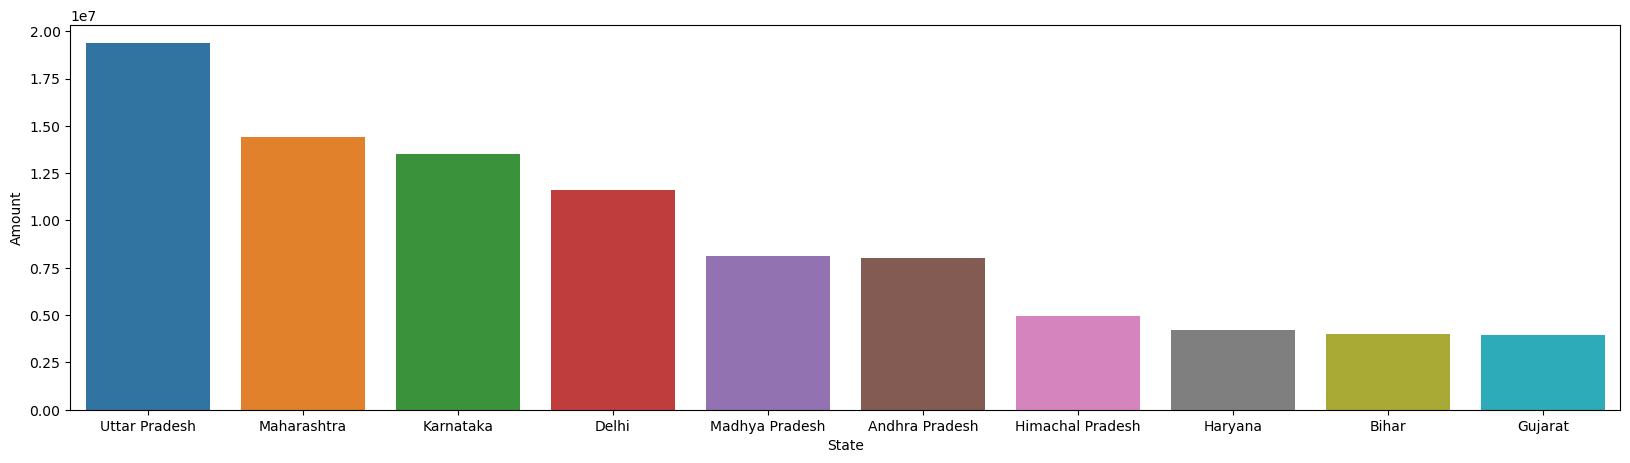

In [30]:
# Total amount/sales from the top 10 states

sales_amount_by_state = data.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
plt.figure(figsize=(20,5))
sns.barplot(x='State', y = 'Amount', data = sales_amount_by_state)
plt.show()

From the above graphs we can see that most of the orders are from Utter Pradesh, Maharashtra and Karnataka respectivily by sales/amount are from Uttar Pradesh, Maharashtra and Karnataka.

## Marital Status

In [31]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


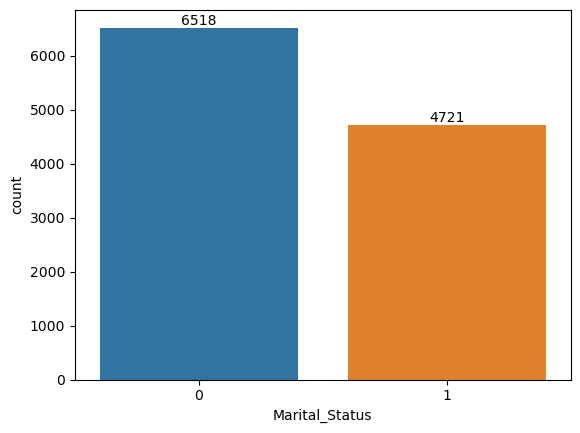

<Figure size 700x300 with 0 Axes>

In [32]:
ax = sns.countplot(x = 'Marital_Status', data = data)
plt.figure(figsize = (7,3))
for bars in ax.containers:
    ax.bar_label(bars)


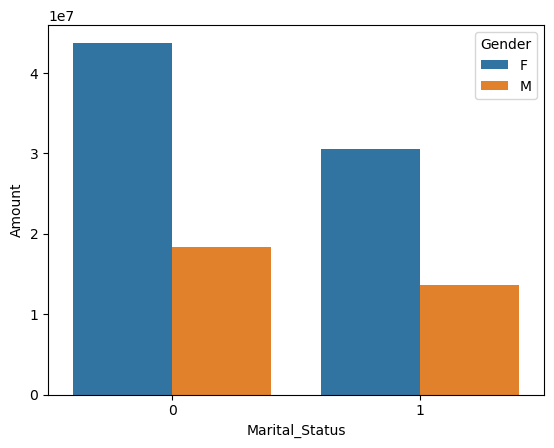

In [33]:
sales_by_m_f = data.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'Marital_Status', y = 'Amount', data = sales_by_m_f, hue = 'Gender')
plt.show()

From above graphs we can see that most of the bayers are Marrid(Women) and they have high purchasing power

## Occupation

In [34]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


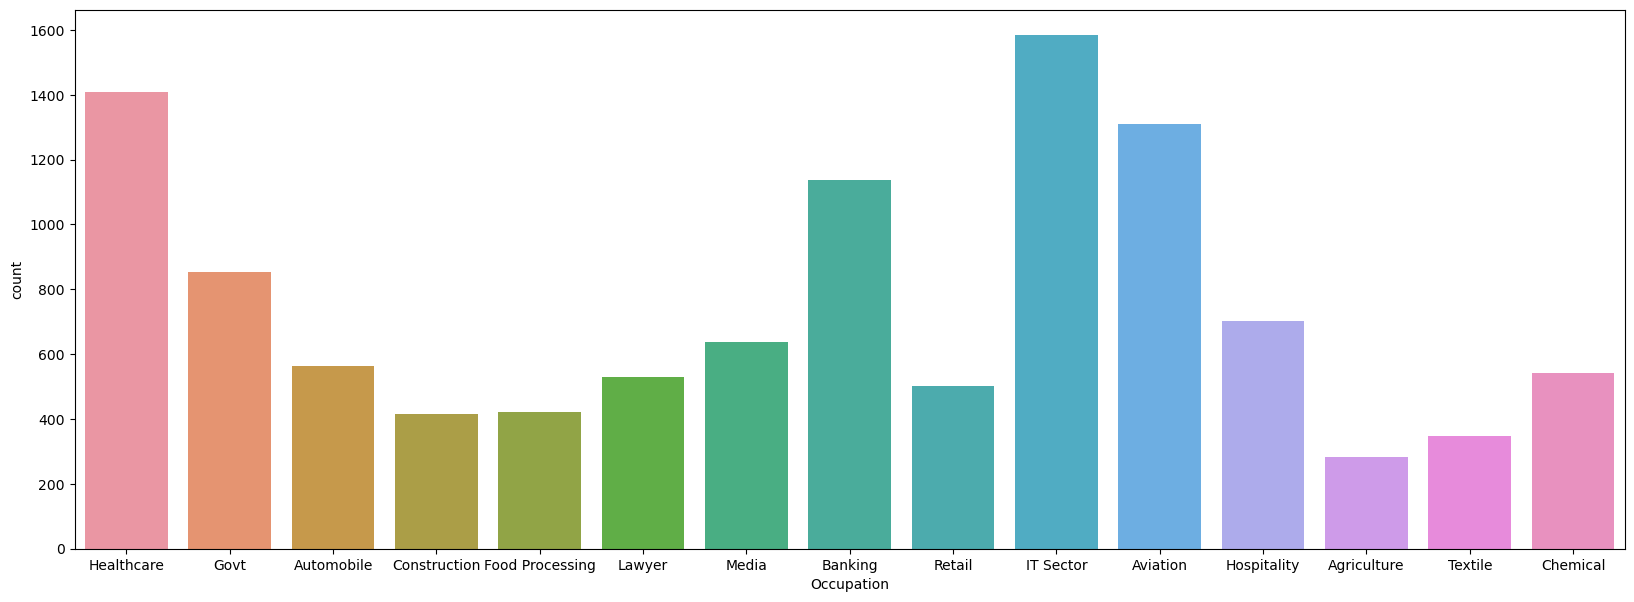

In [35]:
plt.figure(figsize = (20,7))
ax = sns.countplot(x = 'Occupation', data = data)
plt.show()


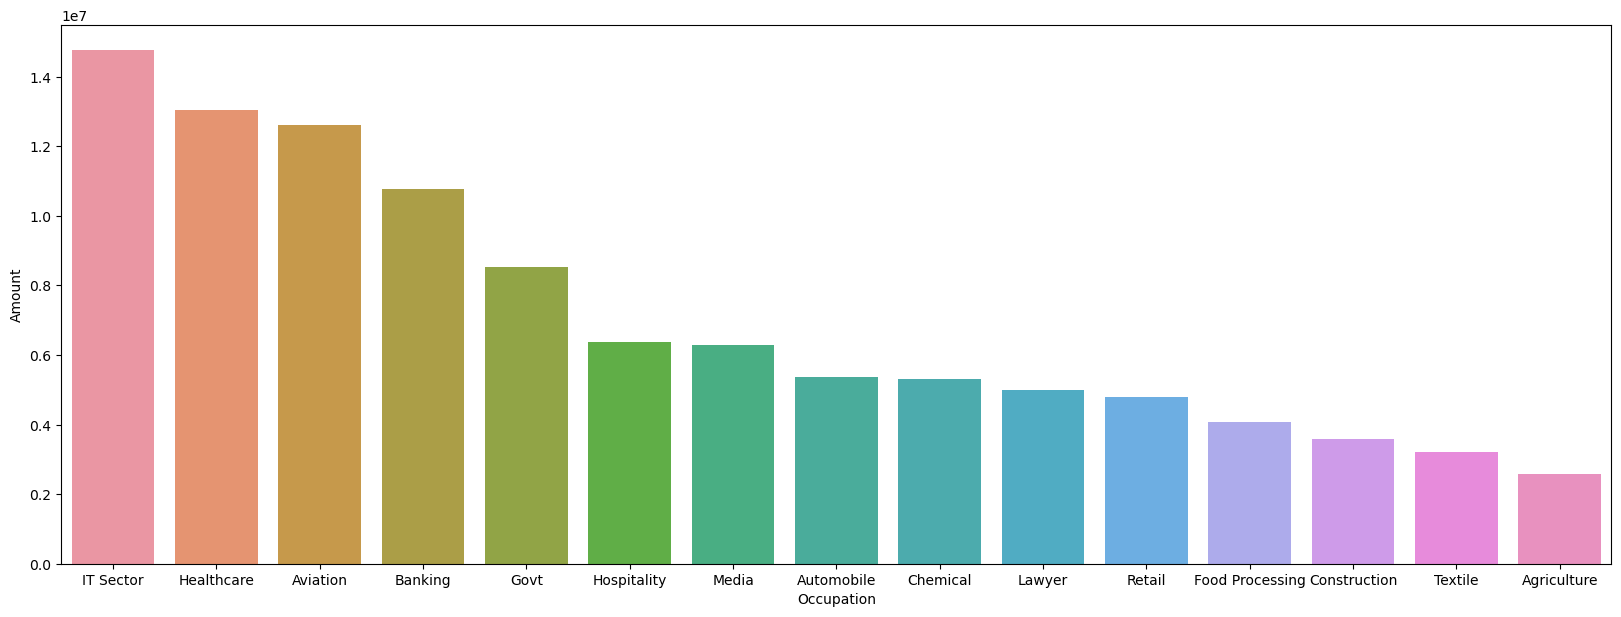

In [36]:
sales_occupation = data.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
plt.figure(figsize = (20,7))
sns.barplot(x='Occupation', y = 'Amount', data = sales_occupation)
plt.show()

*From the above graphs we can see that the most of the buyers are working in IT, Healthcare and Aviation sector*

## Product Category

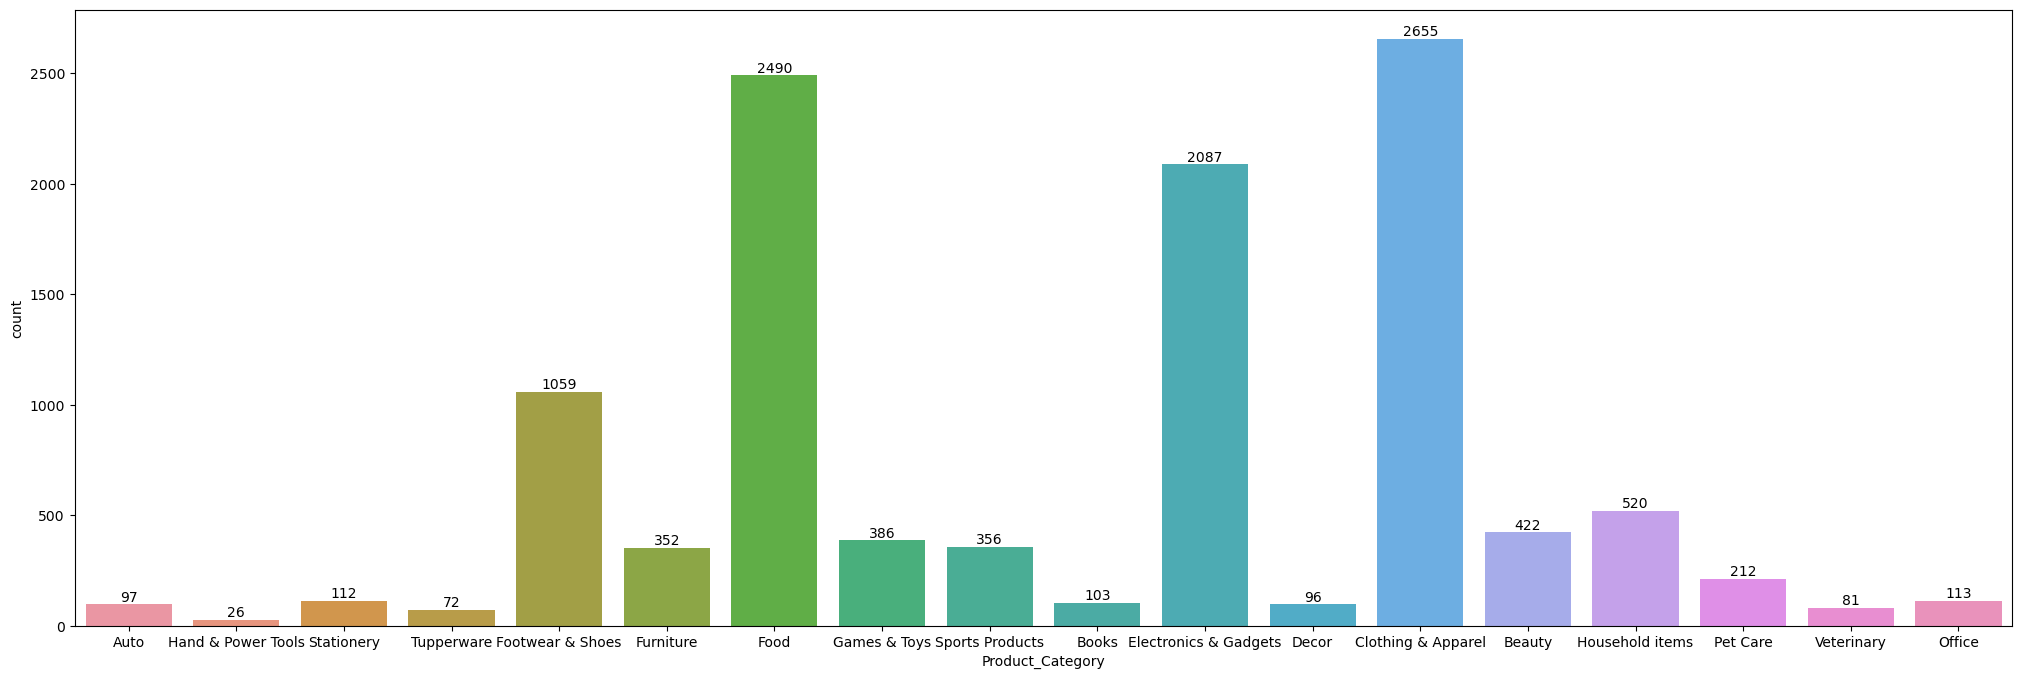

In [37]:
# Total amount of sales by product category.
plt.figure(figsize = (25,8))
ax = sns.countplot(x = 'Product_Category', data = data)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

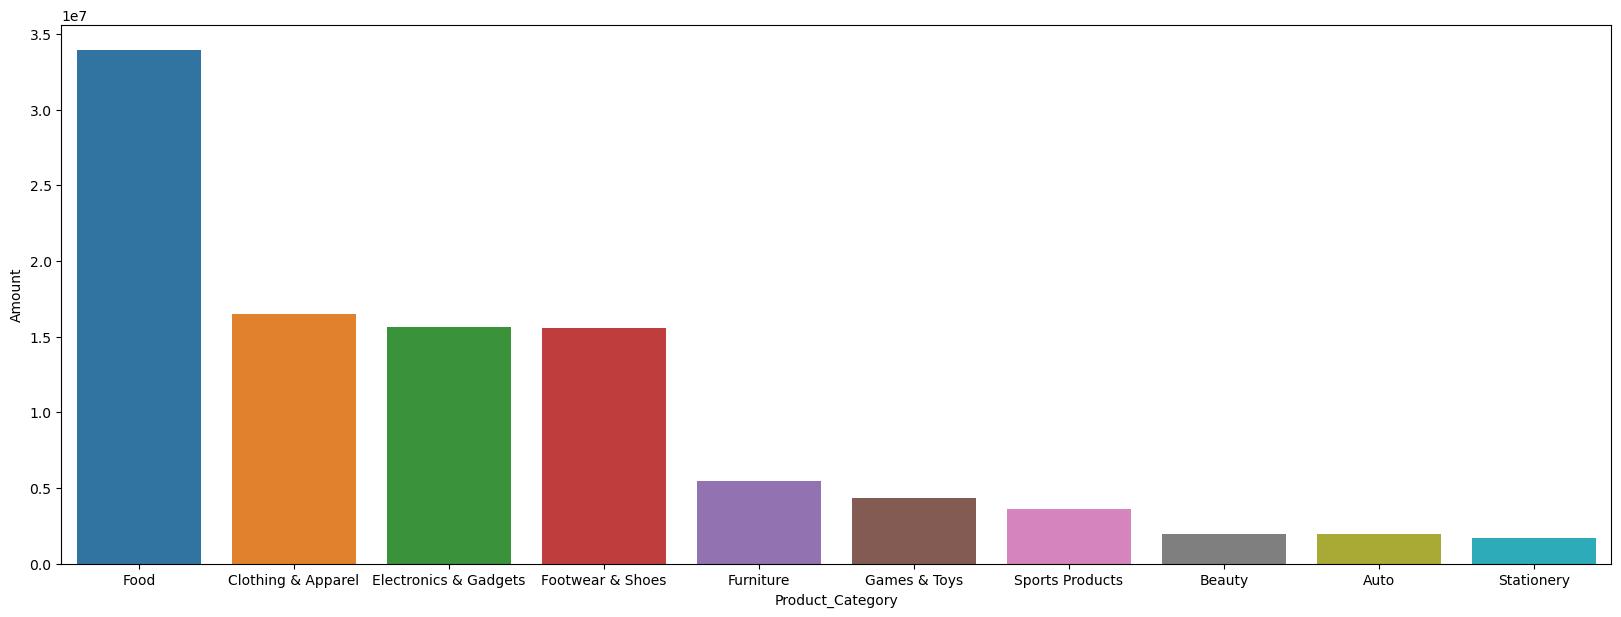

In [38]:
# Top 10 sales 
salesProduct = data.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending= False).head(10)
plt.figure(figsize = (20,7))
sns.barplot(x = 'Product_Category', y='Amount', data = salesProduct)
plt.show()

from the above graphs we can see the most solded products are from the food, Clothing&Apparel, Electronics&Gadgets and footwear & shoes category.

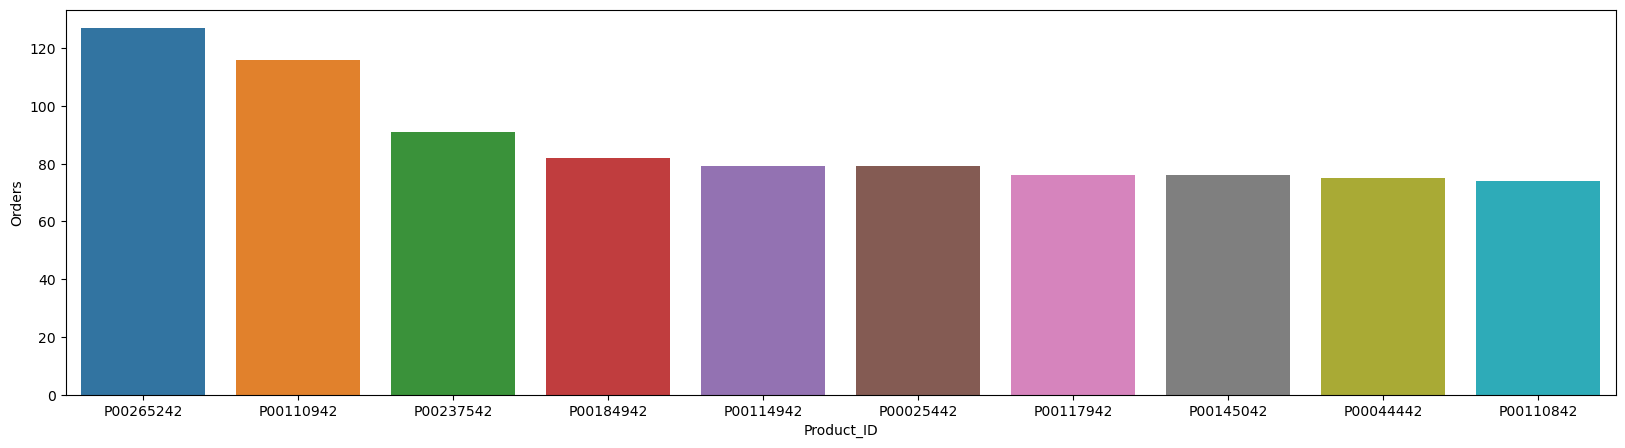

In [39]:
sales_productID = data.groupby(['Product_ID'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
plt.figure(figsize=(20,5))
sns.barplot(x = 'Product_ID', y = 'Orders', data = sales_productID)
plt.show()

# Conclusion:

Married women age group 25-35 yrs from Utter Pradesh, Maharashtra and Karnataka working in IT, Healthcare and Aviation are mostly like to products from Food, Clothing and Electronics category.